<div class="alert alert-info">
    <h2>Project</h2>
        <p>Here at Beta Bank we noticed customers are leaving little by little. Its cheaper to save the existing customers rather than trying to attract new ones so we are going to build a model that is going to predict whether a customer will leave the bank soon or not. The data we are going to be looking at is on clients past behavior and termination of contracts with the bank. So we are going to build the model with the maximum possible F1 score.</p>
</div>

<div class="alert alert-info">
    <h3>Goal</h3>
        <p> To pass the project we need to achieve a F1 Score of atleast 0.59. We will check for the test set and additionally measure the Auc_Roc metric to compare it with the F1.</p>
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

In [2]:
# downloading dataframe to read.
df = pd.read_csv("/datasets/Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-info">
    <h4>Data Uploaded</h4>
        <p> Data is successfully loaded and ready for further preparation</p>
</div>

In [3]:
# checking how many rows and columns in dataframe
df.shape

(10000, 14)

In [4]:
# Looking at column names there non null count and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# Looks for duplicates in the dataframe
df.duplicated().sum()

0

In [6]:
# looking at missing values 
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<div class="alert alert-info">
    <h3>Preliminary Data Conclusion</h3>
        <p>The data above shows that there are 10000 customers with there behaviors and whether or not they exited the bank or not. Our target for this project is Exited. I am going to remove some columns that are redundant like RowNumber. Then CustomerId and Surname because they will not be useful features. The next thing we need to do is consider some options for the null values of Tenure and we should note that Tenure is the only column with missing values. Especially sense we are going to be using metrics like MSE. I will convert it to a int sense a float is not needed and I think using the mean to fill the missing values will not affect the models performance.</p>
</div>

<div class="alert alert-info">
    <h2>Data Prep</h2>
        <p>Below I am preparing the data further</p>
</div>

In [8]:
# remove row, CustomerId and Surname because they are unneccessary.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [9]:
# fills in the missing data in the Tenure column to the mean.
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())

In [10]:
# changes the data type to int instead of float
df['Tenure'] = df['Tenure'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<div class="alert alert-info">
    <h3>Prep Conclusion</h3>
        <p>I brought data to the formats I wanted. elminated redundant columns and filled in the missing values of the Tenure column.</p>
</div>

<div class="alert alert-info">
    <h2>Splitting Data</h2>
        <p>Next I will be splitting the data</p>
</div>

In [11]:
scaler = StandardScaler()
#One Hot Encoding
# next creating a features dataframe and a target dataframe
df = pd.get_dummies(df, drop_first=True)
features = df.drop(columns=['Exited'])
target = df['Exited']
# we are going to take the now split data and place it into training, testing, and validation sets of the base dataframe. 
# 20% for testing and 80% for training. 
feat_train, feat_test, targ_train, targ_test = train_test_split(features, target, test_size=0.20, random_state=42)
feat_train, feat_valid, targ_train, targ_valid = train_test_split(feat_train, targ_train, test_size=0.20, random_state=42)


In [12]:
print(feat_train.shape)
print(targ_train.shape)
print(feat_test.shape)
print(targ_test.shape)
print(feat_valid.shape)
print(targ_valid.shape)

(6400, 11)
(6400,)
(2000, 11)
(2000,)
(1600, 11)
(1600,)


In [13]:
to_normalize = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
scaler = StandardScaler()
scaler.fit(feat_train[to_normalize])
feat_train.loc[:,to_normalize] = scaler.transform(feat_train[to_normalize])
feat_valid.loc[:,to_normalize] = scaler.transform(feat_valid[to_normalize])
feat_test.loc[:,to_normalize] = scaler.transform(feat_test[to_normalize])

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


<div class="alert alert-info">
    <h3>Splitting and OHE Summary</h3>
        <p> We used One Hot Encoding it was required because the categorical variable words dont mean anything to the ML models. Allowing the inverse of each data type for example allowing both male and female columns to remain. that would damage our outcome since there is such a high correlation between them. So it just made a lot of sense to drop first then only let one remain. as well as the fact we dont need France, Germany and Spain columns sense a row not being 1 for Germany and Spain automatically makes it France. After splitting I checked to see if the split made sense and they do. The sample size is also very solid. So I normalized the numeric columns to try helping our evaluation metrics. </p>
</div>

<div class="alert alert-info">
    <h2>Checking For Imbalances</h2>
        <p></p>
</div>

In [14]:
#First, let's look at the class imbalance (if there is any) briefly:
print(df[df['Exited'] == 1]['Exited'].count())
print(df[df['Exited'] == 0]['Exited'].count())

2037
7963


<div class="alert alert-info">
    <h3>Imbalance Summary</h3>
        <p>There is a huge imbalance very close to a 1:4 ratio. below I will be checking to see how much it affects our models performance.</p>
</div>

<div class="alert alert-info">
    <h2>Models</h2>
        <p></p>
</div>

<div class="alert alert-info">
    <h3>Imbalanced Model</h3>
        <p>First we are going to see how the Logistic Regression model operates with out us accounting for the imbalance like we didnt know the imbalance existed</p>
</div>

In [15]:
#Let's pretend like we don't know anything about class imbalance:
LogRegModImb = LogisticRegression(solver='liblinear', random_state=42)
LogRegModImb.fit(feat_train,targ_train)
print('Accuracy', LogRegModImb.score(feat_valid, targ_valid))
print('f1 score:' ,f1_score(targ_valid, LogRegModImb.predict(feat_valid)))
print('AUC:', roc_auc_score(targ_valid, LogRegModImb.predict_proba(feat_valid)[:,1]))

Accuracy 0.811875
f1 score: 0.31435079726651477
AUC: 0.7872131375954607


<div class="alert alert-info">
    <h4>Imbalanced Model Summary</h4>
        <p>I used Logistic Regression with the liblinear solver. When we do not account for the imbalance and use logistic regression our accuracy is 0.81, our f1 score is 0.31 and our AUC ends up being .79. With this imbalance we don't need to check the Random Forest and the Decision Tree because if the imbalance effects the results of the Logistic Regression it will definitely effect the Random Forest and the Decision Tree results sense they perform very poor on imbalanced datasets.</p>
</div>

<div class="alert alert-info">
    <h3>Logistic Regression Model</h3>
        <p>First we are going to balance data and then see how the logisitic regression improves</p>
</div>

In [16]:
LogRegModBal = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
LogRegModBal.fit(feat_train,targ_train)
print('Accuracy', LogRegModBal.score(feat_valid, targ_valid))
print('f1 score:' ,f1_score(targ_valid, LogRegModBal.predict(feat_valid)))
print('AUC:',roc_auc_score(targ_valid, LogRegModBal.predict_proba(feat_valid)[:,1]))

Accuracy 0.731875
f1 score: 0.5301204819277108
AUC: 0.7895001093037949


<div class="alert alert-info">
    <h4>Logistic Regression Summary After Balanced</h4>
        <p>When we account for the imbalance in the Logistic Regression We get an Accuracy of 0.73, a F1 score of 0.47 and a AUC of 0.79 The accuracy of the balanced logistic regression has gone down but the F1 score really improved the AUC was not really impacted. so we are going to do some strategies that account for the imbalancing. </p>
</div>

<div class="alert alert-info">
    <h3>Improving Model Quality</h3>
        <p>I am going to use two approaches to fixing class imbalance.</p>
</div>

<div class="alert alert-info">
    <h3>Upsampling</h3>
        <p></p>
</div>

In [17]:
#Upsampling function from exercise
def upsample(features, target, repeat):
    feat_zeros = features[target == 0]
    feat_ones = features[target == 1]
    targ_zeros = target[target == 0]
    targ_ones = target[target == 1]

    feat_upsampled = pd.concat([feat_zeros] + [feat_ones] * repeat)
    targ_upsampled = pd.concat([targ_zeros] + [targ_ones] * repeat)
    
    feat_upsampled, targ_upsampled = shuffle(
        feat_upsampled, targ_upsampled, random_state=42)
    
    return feat_upsampled, targ_upsampled

feat_upsampled, targ_upsampled = upsample(feat_train, targ_train, 10)

upsampled_LogReg_model =LogisticRegression(random_state=42,solver='liblinear')
upsampled_LogReg_model.fit(feat_upsampled, targ_upsampled)
upsampled_LogReg_predicted_valid = upsampled_LogReg_model.predict(feat_valid)




print('Accuracy', upsampled_LogReg_model.score(feat_valid, targ_valid))
print('f1 score:' ,f1_score(targ_valid, upsampled_LogReg_predicted_valid))
print('AUC:',roc_auc_score(targ_valid, upsampled_LogReg_model.predict_proba(feat_valid)[:,1]))

Accuracy 0.455
f1 score: 0.41476510067114103
AUC: 0.7900069906383103


<div class="alert alert-info">
    <h4>Upsampling Summary</h4>
        <p>Upsampling isn't as good as the built in balanced feature of the Logistic Regression model it really effected the Accuracy and the F1 score is only 0.39.</p>
</div>

<div class="alert alert-info">
    <h3>Downsampling</h3>
        <p></p>
</div>

In [18]:
#Downsampling function from exercise
def downsample(features, target, fraction):
    feat_zeros = features[target == 0]
    feat_ones = features[target == 1]
    targ_zeros = target[target == 0]
    targ_ones = target[target == 1]

    feat_downsampled = pd.concat(
        [feat_zeros.sample(frac=fraction, random_state=42)] + [feat_ones])
    targ_downsampled = pd.concat(
        [targ_zeros.sample(frac=fraction, random_state=42)] + [targ_ones])
    
    feat_downsampled, targ_downsampled = shuffle(
        feat_downsampled, targ_downsampled, random_state=42)
    
    return feat_downsampled, targ_downsampled

feat_downsampled, targ_downsampled = downsample(feat_train, targ_train, 0.1)

down_LogReg_model =LogisticRegression(random_state=42,solver='liblinear')
down_LogReg_model.fit(feat_downsampled, targ_downsampled)
down_LogReg_predicted_valid = down_LogReg_model.predict(feat_valid)

print('Accuracy:', down_LogReg_model.score(feat_valid, targ_valid))
print("F1:", f1_score(targ_valid, down_LogReg_predicted_valid))
print("AUC-ROC:", roc_auc_score(targ_valid, down_LogReg_model.predict_proba(feat_valid)[:,1]))

Accuracy: 0.45
F1: 0.4141145139813582
AUC-ROC: 0.7856156205933154


<div class="alert alert-info">
    <h4>Downsampling Summary</h4>
        <p>The Down Sampling also isn't as good as the build in balanced feature of the Logistic Regression model and is very similar to the upsampling.</p>
</div>

<div class="alert alert-info">
    <h3>Decision Tree Model</h3>
        <p></p>
</div>

In [19]:
depth_param = {'max_depth':range(1,25)}
DecTreeMod = DecisionTreeClassifier(random_state=42)
DecTreeModOpt = GridSearchCV(DecTreeMod,depth_param)
DecTreeModOpt.fit(feat_train, targ_train)
print(DecTreeModOpt.best_estimator_)
DecTreeModOpt_predicted_valid = DecTreeModOpt.predict(feat_valid)
print('Accuracy:', DecTreeModOpt.score(feat_valid, targ_valid))
print("F1:", f1_score(targ_valid, DecTreeModOpt_predicted_valid))
print("AUC-ROC:", roc_auc_score(targ_valid, DecTreeModOpt.predict_proba(feat_valid)[:,1]))

DecisionTreeClassifier(max_depth=6, random_state=42)
Accuracy: 0.853125
F1: 0.5093945720250522
AUC-ROC: 0.8408188415719566


<div class="alert alert-info">
    <h4>Decision Tree Summary</h4>
        <p>The Decision Tree with its optimized hyper parameters worked better then the balanced feature in the Logistic Regression model. The accuracy is 0.85, the Fl is 0.51 and the AUC is 0.84. </p>
</div>

<div class="alert alert-info">
    <h3>Random Forest Model</h3>
        <p></p>
</div>

In [20]:
depth_param = {'max_depth':range(1,10), 'n_estimators':range(1,50)}
RandForestMod = RandomForestClassifier(random_state=42)
RandForestOpt = GridSearchCV(RandForestMod,depth_param)
RandForestOpt.fit(feat_train, targ_train)
print(RandForestOpt.best_estimator_)
RandForestOpt_predicted_valid = RandForestOpt.predict(feat_valid)

print('Accuracy', RandForestOpt.score(feat_valid, targ_valid))
print("F1:", f1_score(targ_valid, RandForestOpt_predicted_valid))
print("AUC-ROC:", roc_auc_score(targ_valid, RandForestOpt.predict_proba(feat_valid)[:,1]))

RandomForestClassifier(max_depth=9, n_estimators=47, random_state=42)
Accuracy 0.865625
F1: 0.5725646123260437
AUC-ROC: 0.8680787275596907


<div class="alert alert-info">
    <h4>Random Forest Summary</h4>
        <p>Random Forest gave us the best F1 score so far at 0.57 it took a very long time to run this code. If the run time is a priority the parameter space needs to be greatly reduced. There is an issue that is encountered here though. We need a f1 score of atleast 0.59 and we already have done an extensive search over a huge parameter space. So I am going to keep one parameter as a constant and increase the range of the range of the n_estimator and try again. The most important part is I will use the class weight = balanced since increasing the parameter space alone is most likely not going to increase the f1 score by much.</p>
</div>

<div class="alert alert-info">
    <h3>Random Forest 2nd Model</h3>
        <p></p>
</div>

In [21]:
depth_param = {'n_estimators':range(1,200)}
RandForestMod = RandomForestClassifier(random_state=42, max_depth = 8,class_weight='balanced')
RandForestOpt = GridSearchCV(RandForestMod, depth_param)
RandForestOpt.fit(feat_train, targ_train)
print(RandForestOpt.best_estimator_)
RandForestOpt_predicted_valid = RandForestOpt.predict(feat_valid)

print('Accuracy:', RandForestOpt.score(feat_valid, targ_valid))
print("F1:", f1_score(targ_valid, RandForestOpt_predicted_valid))
print("AUC-ROC:", roc_auc_score(targ_valid, RandForestOpt.predict_proba(feat_valid)[:,1]))

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=34,
                       random_state=42)
Accuracy: 0.833125
F1: 0.6337448559670782
AUC-ROC: 0.8711200155667822


<div class="alert alert-info">
    <h4>Random Forest 2nd Model Summary</h4>
        <p>The 2nd Random Forest model achieved the goal of hitting over a 0.59 f1 score it acutally hit a 0.63 f1 score. we could get away with a n_estimator of 149. but we did achieve an acceptable number to give us enough confidence to take our model to the testing data the max depth being 8 is what was also specified.</p>
</div>

<div class="alert alert-info">
    <h3>Model Conclusion</h3>
        <p>The best performing model was the Random Forest it did take a ton of time to process the data though. The Logistic Regression and the decision tree were not bad but the Random Forest did out perform them. the upsampling and the downsampling actually performed the weakest.</p>
</div>

<div class="alert alert-info">
    <h2>Final Testing</h2>
        <p></p>
</div>

In [22]:
RandForestOpt_predicted_test = RandForestOpt.predict(feat_test)

print('Accuracy:', RandForestOpt.score(feat_valid, targ_valid))
print("F1:", f1_score(targ_test, RandForestOpt_predicted_test))
print("AUC-ROC:", roc_auc_score(targ_test, RandForestOpt.predict_proba(feat_test)[:,1]))

Accuracy: 0.833125
F1: 0.625414364640884
AUC-ROC: 0.862405411439456


<div class="alert alert-info">
    <h3>Test Dataset</h3>
        <p>The test dataset had a 0.83 in accuracy, a f1 score of 0.63 and a AUC ROC of 0.86</p>
</div>

<div class="alert alert-info">
    <h3>AUC-ROC Curve Plot</h3>
        <p></p>
</div>

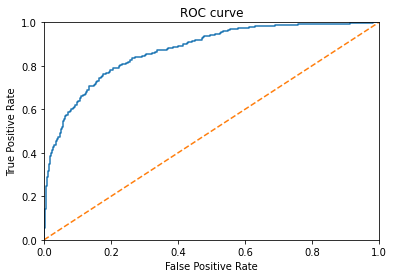

In [23]:
probabilities_valid = RandForestOpt.predict_proba(feat_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(targ_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

<div class="alert alert-info">
    <h4>AUC-ROC Curve Plot Summary</h4>
        <p>We see a beautiful deviation under the true positive rate curve. the orange line or range model signifies that our model performs that much better than someone just working by chance. This is validated by the AUC we calculated as well.</p>
</div>

<div class="alert alert-info">
    <h3>Precision Recall Curve Plot</h3>
        <p></p>
</div>

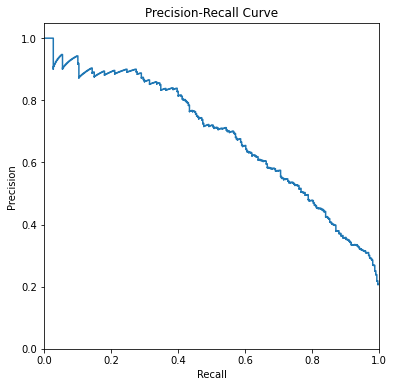

In [24]:
precision, recall, thresholds = precision_recall_curve(targ_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

<div class="alert alert-info">
    <h4>Precision RecallCurve Plot Summary</h4>
        <p>The precision recall curve is very high. that signifies the high performance of the model. This along with the AUC-ROC and the F1 score all signify that we have provided the company with a good model to work with.</p>
</div>

<div class="alert alert-info">
    <h2>Final Conclusion</h2>
        <p>The best model is the Random Forest Classifier. Bootstrap is set to true and the class weight parameter set to balanced. Setting it to balanced is very important otherwise the performance expectations are not met. The hyperparameters max-depth set to 8 and the n)estimator to 149 the random state = 42 is what gave me the results I produced. The test data set had a f1 score of 0.63 and the AUC of 0.86 these metrics mean good quality and meet the assignments expectations. I hope the model I did above helps the Beta-Bank in the way they need.</p>
</div>